# Predicting Ads Click-Through Rate (CTR)

- Click-Through Rate (CTR) prediction is a fundamental task in online advertising. The main objective is to estimate the probability that a user will click on a given advertisement. Accurate CTR prediction is essential for optimizing ad campaigns, allowing advertisers to allocate resources efficiently, target specific audience segments, and maximize return on investment (ROI). Machine learning techniques are often employed for this task due to their ability to process large datasets and identify intricate patterns that help forecast user behavior.

## The Role of Machine Learning in CTR Prediction

- Machine learning (ML) algorithms are particularly suited for CTR prediction as they can extract complex patterns from historical data and make informed predictions. Below, we outline how machine learning contributes to predicting ad click-through rates:

### 1. **Feature Engineering**

- To achieve accurate predictions, relevant features must be engineered and selected. Common features include:

- User Demographics: Age, gender, location, and other personal attributes.

- Time of Day: The hour or day when the ad is shown.

- Website Content: The type of content displayed on the website.

- Historical Click Behavior: Users’ past interactions with ads.

### 2. **Model Training**

- Once the relevant features are prepared, ML models are trained using historical data. The training phase allows the models to learn relationships between the input features and the target variable (click/no-click). During this stage, the models are optimized to recognize patterns that contribute to ad clicks.

### 3. **Prediction**

- After training, the model can predict the probability of a user clicking on a new ad by applying the learned patterns to new data instances. These predictions provide advertisers with valuable insights into potential user behavior.

### 4. **Performance Evaluation**

- Model performance is assessed using various evaluation metrics, such as:

    **Accuracy**: The proportion of correct predictions.

    **Precision**: The ratio of true positive predictions to total positive predictions.

    **Recall**: The ratio of true positive predictions to actual positive cases.

    **F1-Score**: The harmonic mean of precision and recall.

- These metrics help determine the effectiveness of the model and identify areas that may need adjustment or improvement.

## Benefits and Challenges of Using Machine Learning for CTR Prediction

### Benefits

- **Improved Targeting**: Machine learning models can analyze vast datasets and reveal patterns in user behavior, enabling advertisers to better target their ads to specific audiences.

- **Cost Efficiency**: With more accurate CTR predictions, advertisers can optimize their ad spending, leading to more efficient budget allocation and higher ROI.

### Challenges

- **Data Privacy Concerns**: Machine learning models rely on user data, which can raise privacy and security issues.

- **Model Complexity**: Creating and maintaining accurate ML models for CTR prediction can be complex, especially given the dynamic and ever-changing nature of online advertising.

## Conclusion

- While there are challenges associated with using machine learning for CTR prediction, the benefits often outweigh the drawbacks. Machine learning provides advertisers with valuable insights that help them fine-tune their campaigns and maximize ROI. In the following code examples, we will demonstrate how to implement machine learning techniques to predict ad click-through rates and evaluate the performance of these models.

In [1]:
# Install faker package, which is a useful tool for generating synthetic or fake data for testing
# !pip install faker

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import joblib
from faker import Faker


In [3]:
# Load the dataset
data = pd.read_csv('data/ad_10000records.csv')

# See the contents of the dataset
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [4]:
# Convert 'Timestamp' column to datetime type
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Extract hour, day, and month from timestamp
data['Hour'] = data['Timestamp'].dt.hour
data['Day'] = data['Timestamp'].dt.day
data['Month'] = data['Timestamp'].dt.month

In [5]:
# Store unique cities and countries before encoding
unique_cities = data['City'].unique()
unique_countries = data['Country'].unique()

# Initialize label encoders for categorical variables
label_encoders = {}

# Encode categorical variables
for col in ['City', 'Gender', 'Country']:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,Hour,Day,Month
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,234,1,174,2016-06-09 21:43:05,0,21,9,6
1,41.73,31.0,61840.26,207.17,Optional full-range projection,460,1,166,2016-01-16 17:56:05,0,17,16,1
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,379,0,71,2016-06-29 10:50:45,0,10,29,6
3,59.88,28.0,56180.93,207.17,Balanced empowering success,269,0,205,2016-06-21 14:32:32,0,14,21,6
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,495,0,149,2016-07-21 10:54:35,1,10,21,7


In [6]:
# Concatenate numerical and timestamp features
X = data.drop(['Clicked on Ad', 'Ad Topic Line', 'Timestamp'], axis=1)
y = data['Clicked on Ad']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBClassifier
clf_xgb = xgb.XGBClassifier(n_estimators=100, random_state=42)  # Use XGBClassifier
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [7]:
# Evaluate the model
y_pred = clf_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute classification report
class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()

# Print classification report in DataFrame
print("\nClassification Report:")
print(class_report_df)

Accuracy: 0.882

Classification Report:
              precision    recall  f1-score   support
0              0.881373  0.886588  0.883972  1014.000
1              0.882653  0.877282  0.879959   986.000
accuracy       0.882000  0.882000  0.882000     0.882
macro avg      0.882013  0.881935  0.881966  2000.000
weighted avg   0.882004  0.882000  0.881994  2000.000


In [8]:
fake = Faker()

# Generate synthetic 'City' and 'Country' values using unique values from the original dataset
n_samples = 1000  # Number of synthetic samples
synthetic_data = pd.DataFrame({
    'Daily Time Spent on Site': np.random.uniform(20, 120, n_samples),
    'Age': np.random.randint(18, 65, n_samples),
    'Area Income': np.random.uniform(15000, 100000, n_samples),
    'Daily Internet Usage': np.random.uniform(50, 300, n_samples),
    'City': [fake.random_element(unique_cities) for _ in range(n_samples)],
    'Gender': [fake.random_element(['Male', 'Female']) for _ in range(n_samples)],
    'Country': [fake.random_element(unique_countries) for _ in range(n_samples)],
    'Timestamp': [fake.date_time_this_year() for _ in range(n_samples)]
})

In [9]:
# Convert 'Timestamp' column to datetime type
synthetic_data['Timestamp'] = pd.to_datetime(synthetic_data['Timestamp'])

# Extract hour, day, and month from timestamp for synthetic data
synthetic_data['Hour'] = synthetic_data['Timestamp'].dt.hour
synthetic_data['Day'] = synthetic_data['Timestamp'].dt.day
synthetic_data['Month'] = synthetic_data['Timestamp'].dt.month

# Encode categorical variables for synthetic data using the same label encoders
for col in ['Gender']:
    synthetic_data[col] = label_encoders[col].transform(synthetic_data[col])

# Filter out any synthetic values not present in the original dataset for 'City' and 'Country'
synthetic_data = synthetic_data[synthetic_data['City'].isin(unique_cities)]
synthetic_data = synthetic_data[synthetic_data['Country'].isin(unique_countries)]

# Encode 'City' and 'Country' using label encoders
synthetic_data['City'] = label_encoders['City'].transform(synthetic_data['City'])
synthetic_data['Country'] = label_encoders['Country'].transform(synthetic_data['Country'])

# Drop Timestamp feature for synthetic data
synthetic_X = synthetic_data.drop(['Timestamp'], axis=1)

In [10]:
highest_accuracy = 0.0
best_seed = None

for seed in range(1000):  # Adjust the range for more or fewer seeds
    np.random.seed(seed)  # Set the random seed

    # Generate synthetic labels for each seed
    synthetic_data['Clicked on Ad'] = np.random.randint(0, 2, len(synthetic_data))

    # Make predictions for the current synthetic labels
    synthetic_predictions = clf_xgb.predict(synthetic_X)

    # Calculate accuracy for the current seed
    accuracy_synthetic = accuracy_score(synthetic_data['Clicked on Ad'], synthetic_predictions)

    # Update highest accuracy and best seed if necessary
    if accuracy_synthetic > highest_accuracy:
        highest_accuracy = accuracy_synthetic
        best_seed = seed

# Evaluate the accuracy of the model on the synthetic data
print(f"Accuracy on Synthetic Data: {highest_accuracy:.4f}")

Accuracy on Synthetic Data: 0.5450


In [11]:
# Decode city, gender, and country names
synthetic_data['City'] = label_encoders['City'].inverse_transform(synthetic_data['City'])
synthetic_data['Gender'] = label_encoders['Gender'].inverse_transform(synthetic_data['Gender'])
synthetic_data['Country'] = label_encoders['Country'].inverse_transform(synthetic_data['Country'])

# Print synthetic dataset along with predictions
synthetic_data['Predictions'] = synthetic_predictions
print("Synthetic Dataset with Predictions:")
synthetic_data.head()

Synthetic Dataset with Predictions:


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Gender,Country,Timestamp,Hour,Day,Month,Clicked on Ad,Predictions
0,112.363615,24,85922.061614,99.868113,Lake Rhondaburgh,Female,United States of America,2024-07-26 08:07:47,8,26,7,0,0
1,72.358136,46,26461.560012,59.839345,Port Destiny,Male,Niue,2024-02-16 23:18:38,23,16,2,0,1
2,101.351363,62,99982.242093,166.449249,Burgessside,Female,Estonia,2024-06-27 17:13:24,17,27,6,1,1
3,65.378471,33,46047.131162,274.740139,Port Jacqueline,Male,Bhutan,2024-03-04 08:52:09,8,4,3,1,1
4,104.002453,62,58228.560435,99.002817,North Johnside,Male,Mauritania,2024-03-20 21:45:17,21,20,3,0,1


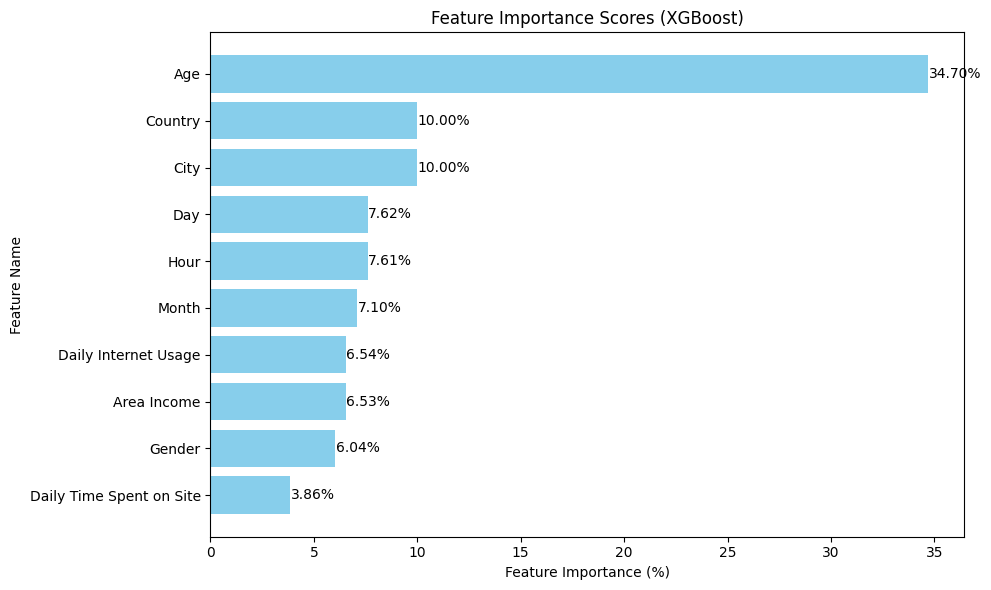

In [12]:
# Get and sort feature importances
feature_importances = clf_xgb.feature_importances_
feature_names = X_train.columns
total_importance = sum(feature_importances)  # Calculate total importance

# Calculate percentage importances
percentage_importances = (feature_importances / total_importance) * 100
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': percentage_importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Create feature importance visualization with percentages
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'], color='skyblue')
plt.xlabel('Feature Importance (%)')
plt.ylabel('Feature Name')
plt.title('Feature Importance Scores (XGBoost)')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features on top

# Add percentage labels on top of bars
for i, v in enumerate(feature_importance_df['importance']):
    plt.text(v + 0.02, i, f"{v:.2f}%", va='center')  # Adjust offset for better positioning

plt.tight_layout()
plt.show()